In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [7]:
dados = pd.read_csv('Stars.csv')
dados

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [8]:
datap = pd.DataFrame(dados)

datap['Color'] = datap["Color"].str.replace(r'-', r'').str.replace(' ', '').str.lower()
gcolor = datap.groupby(['Color'])
gcolor.size()

Color
blue                 56
bluewhite            41
orange                2
orangered             1
paleyelloworange      1
red                 112
white                10
whiteyellow           1
whitish               2
yellowish             3
yellowishwhite        3
yellowwhite           8
dtype: int64

In [9]:
dados.isnull().values.any()

False

In [10]:
def SC(sc):

  list = ['M', 'K', 'G', 'F', 'A', 'B', 'O']
  for i in range(len(list)):
    if sc == list[i]: return i+1



datap['Spectral_Class'] = [SC(sc) for sc in dados['Spectral_Class']]

gSC = datap.groupby('Spectral_Class')
gSC.size()

Spectral_Class
1    111
2      6
3      1
4     17
5     19
6     46
7     40
dtype: int64

In [11]:
datap = datap.drop(['Color'], axis=1)
datap

,Temperature,L,R,A_M,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,1,0
1,3042,0.000500,0.1542,16.60,1,0
2,2600,0.000300,0.1020,18.70,1,0
3,2800,0.000200,0.1600,16.65,1,0
4,1939,0.000138,0.1030,20.06,1,0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,7,5
236,30839,834042.000000,1194.0000,-10.63,7,5
237,8829,537493.000000,1423.0000,-10.73,5,5
238,9235,404940.000000,1112.0000,-11.23,5,5


In [12]:
cont = []

for i in datap:
    for j in datap:

        if i == j or j+i in cont: continue
        plt.scatter(datap[i], datap[j])
        plt.grid()
        plt.xlabel(i)
        plt.ylabel(j)
        plt.savefig('Graphs/%sx%s' %(i, j))
        plt.close()
        cont += [i+j]


In [13]:
datap.describe()

,Temperature,L,R,A_M,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,3.520833,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,2.531720,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,1.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,4.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,6.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,7.000000,5.000000


In [14]:
for i in datap:
    plt.hist(datap[i], bins=20)
    plt.xlabel(i)
    plt.savefig('Hists/%s' %i)
    plt.close()
    

plt.hist(datap[datap['R'] < 500]['R'], bins=20)
plt.savefig('Hists/R-')
plt.close()

plt.hist(datap[datap['R'] > 500]['R'], bins=20)
plt.savefig('Hists/R+')
plt.close()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

dataps = pd.DataFrame(datap)

scaler = MinMaxScaler()
inds = ['Temperature', 'L', 'R', 'A_M']

#dataps[inds] = scaler.fit_transform(dataps[inds])
dataps = pd.DataFrame(scaler.fit_transform(dataps), columns=dataps.columns)


# standard = StandardScaler()
# dataps['A_M'] = standard.fit_transform(np.array(dataps[['A_M']]))

dataps

,Temperature,L,R,A_M,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,0.000000,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.000000,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.000000,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.000000,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.000000,0.0
...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,1.000000,1.0
236,0.759307,9.818959e-01,0.612777,0.040338,1.000000,1.0
237,0.181025,6.327765e-01,0.730304,0.037211,0.666667,1.0
238,0.191692,4.767253e-01,0.570694,0.021576,0.666667,1.0


90%% dos dados são explicados com as 3 componentes.


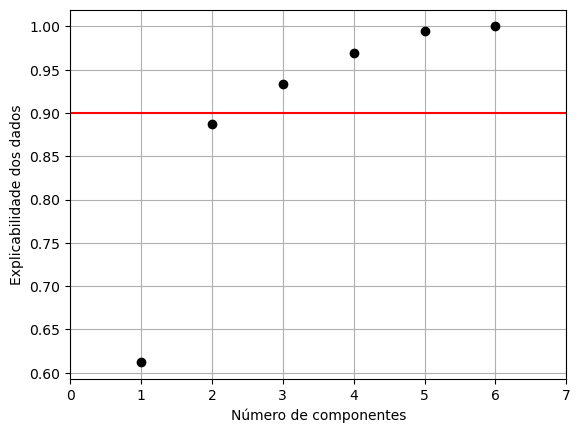

In [29]:
pca = PCA()
pca.fit(dataps)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
x = pca.transform(dataps)

explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,datap.shape[1]+1,1)
plt.scatter(factors,explainability, color='black', zorder = 5)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

p = factors[explainability<0.9].max()+1

if p<2:
    p=2
    
print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca = PCA(n_components=p)
pca.fit(dataps)
x = pca.transform(dataps)
plt.xlim(0, 7)
plt.grid()
plt.savefig('3-Explicabilidade', dpi=300)
plt.show()

In [17]:
pca = PCA(n_components=3)

datapst = pca.fit_transform(dataps)

pd.DataFrame(pca.components_, columns=dataps.columns, index=[1+i for i in range(len(pca.components_))])


,Temperature,L,R,A_M,Spectral_Class,Type
1,0.300302,0.251764,0.218714,-0.489929,0.535559,0.521291
2,-0.322121,0.146583,0.478231,-0.311908,-0.672112,0.311488
3,0.470490,0.300792,0.661721,0.392534,-0.014800,-0.309818


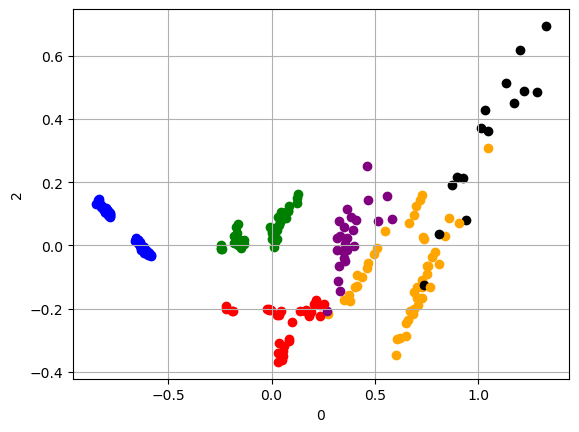

In [60]:
from sklearn.cluster import AgglomerativeClustering

datapst = pd.DataFrame(datapst)

def clustering(n, plot='n'):

    color = ['red', 'blue', 'green', 'orange', 'black', 'purple', 'pink', 'cyan', 'magenta', 'brown']

    cluster = AgglomerativeClustering(n_clusters=n).fit(datapst)
    clusters = np.array(cluster.fit_predict(datapst))

    feat1 = 0
    feat2 = 2

    if plot=='n': return clusters

    
    for i in range(len(clusters)):
        plt.scatter([datapst[feat1][i]], [datapst[feat2][i]], color = color[clusters[i]])

    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.grid()
    plt.savefig('5-%sx%s' %(feat1, feat2))
    plt.show()

    return clusters

categ = clustering(6, 'y')

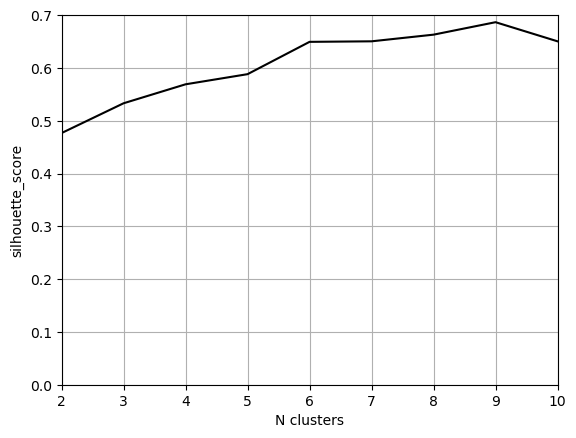

9


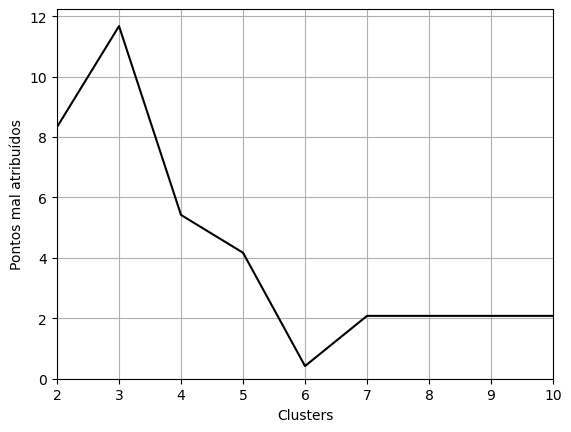

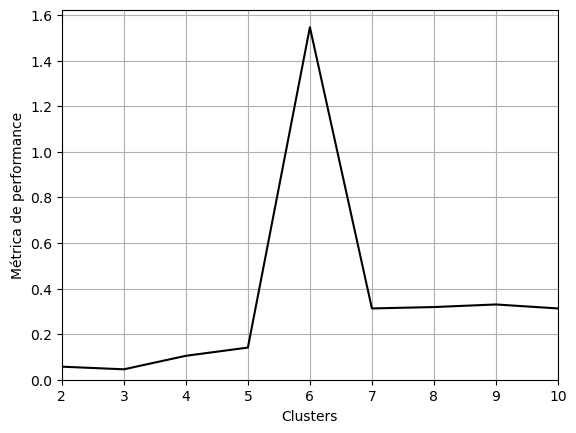

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

N = 9
Xcat = [2+i for i in range(N)]
Yscore = [0 for i in range(N)]
Ysamp = [0 for i in range(N)]
pontos_bad = [0 for i in range(N)]

for i in range(N):
    categ = clustering(i+2)
    Yscore[i] = silhouette_score(datapst, categ)
    Ysamp[i] = silhouette_samples(datapst, categ)
    mask = ( Ysamp[i] < 0 )
    pontos_bad[i] = (100 * mask.sum() / len(mask)).round(2)

plt.plot(Xcat, Yscore, color = 'black')
plt.grid()
plt.xlabel('N clusters')
plt.ylabel('silhouette_score')
plt.xlim(2, N+1)
plt.ylim(0, 0.7)
plt.show()
#print(Xcat[np.argmax(Yscore)])

plt.figure()
plt.grid()
plt.plot(Xcat, pontos_bad, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('Pontos mal atribuídos')
plt.xlim(2, N+1)
plt.ylim(0)

plt.figure()
plt.grid()
plt.plot(Xcat, np.array(Yscore)/np.array(pontos_bad), color = 'black')
plt.xlabel('Clusters')
plt.ylabel('Métrica de performance')
plt.xlim(2, N+1)
plt.ylim(0)
plt.savefig('5-perf', dpi=300)

print(Xcat[np.argmax(Yscore)])

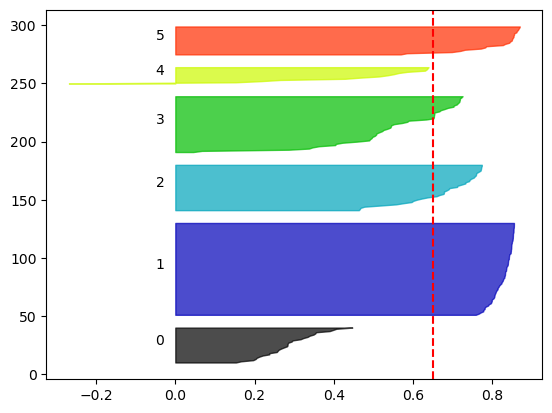

In [43]:
import matplotlib.cm as cm

def silueta(datapst, categ, n_clusters = 9):
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(datapst, categ)
    y_lower = 10

    silhouette_avg = silhouette_score(datapst, categ)

    categ = clustering(n_clusters)

    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[categ == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

N = 6
categ = clustering(N)
silueta(datapst, categ, N)
plt.savefig('5-sil', dpi=300)
plt.show()

In [21]:
datapst

,0,1,2
0,-0.782463,-0.001628,0.094920
1,-0.790023,-0.006094,0.100485
2,-0.825688,-0.022847,0.120779
3,-0.792698,-0.004532,0.098109
4,-0.851739,-0.030517,0.129302
...,...,...,...
235,1.219786,-0.014321,0.487168
236,1.284517,0.100552,0.486033
237,0.871680,0.516871,0.190420
238,0.808346,0.419106,0.036745


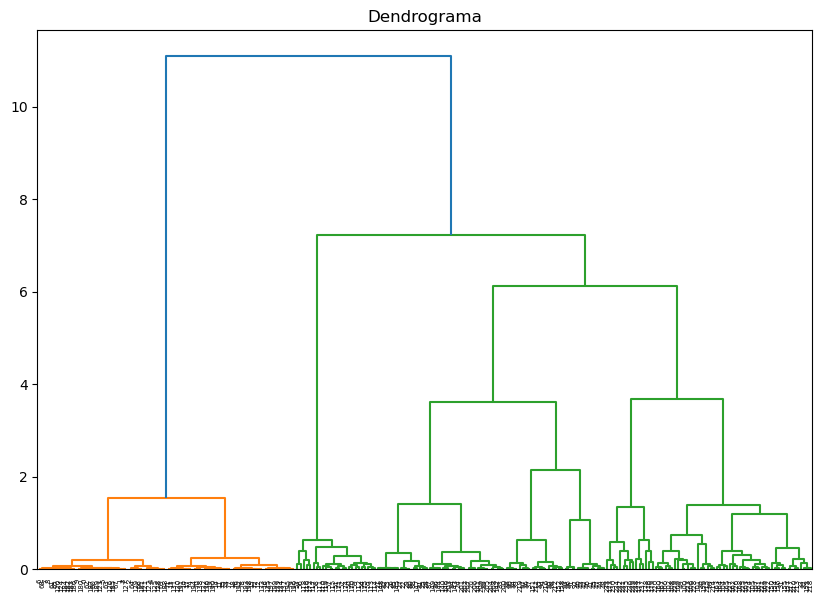

In [22]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
clusters = shc.linkage(datapst, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

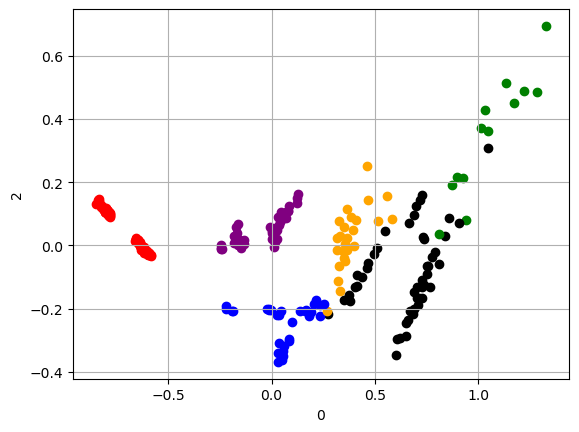

In [57]:
from sklearn.cluster import KMeans

def kmean(n, data, plot='n'):

    color = ['red', 'blue', 'green', 'orange', 'black', 'purple', 'pink', 'cyan', 'magenta', 'brown']

    kmeans = KMeans(n_clusters=n).fit(data)
    categorias = kmeans.labels_

    if plot == 'n': return categorias

    feat1 = 0
    feat2 = 2

    for i in range(len(clusters)):
        plt.scatter([datapst[feat1][i]], [datapst[feat2][i]], color = color[categorias[i]])

    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.grid()
    plt.savefig('6-%sx%s' %(feat1, feat2))
    plt.show()

    return categorias

categ = kmean(6, datapst, plot='y')

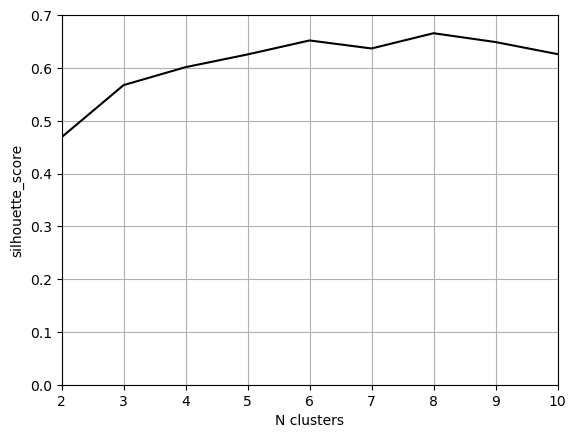

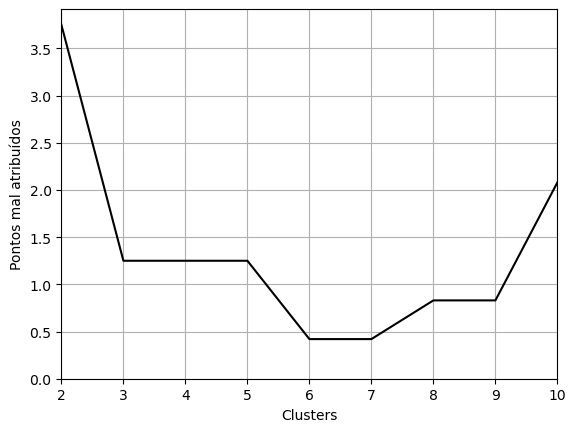

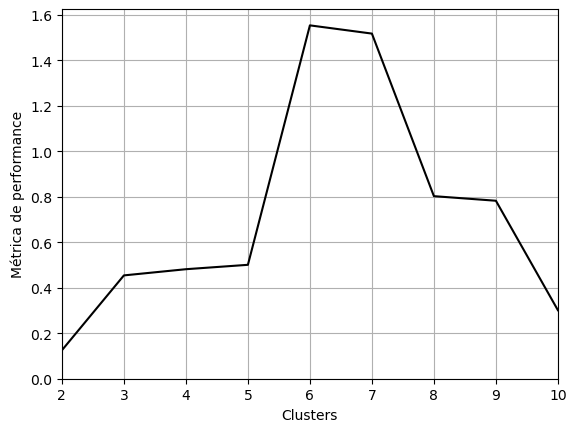

In [31]:
N = 9
Xcat = [2+i for i in range(N)]
Yscore = [0 for i in range(N)]
Ysamp = [0 for i in range(N)]
pontos_bad = [0 for i in range(N)]

for i in range(N):

    categ = kmean(i+2, datapst)
    Yscore[i] = silhouette_score(datapst, categ)
    Ysamp[i] = silhouette_samples(datapst, categ)
    mask = ( Ysamp[i] < 0 )
    pontos_bad[i] = (100 * mask.sum() / len(mask)).round(2)

plt.plot(Xcat, Yscore, color = 'black')
plt.grid()
plt.xlabel('N clusters')
plt.ylabel('silhouette_score')
plt.xlim(2, N+1)
plt.ylim(0, 0.7)
plt.show()
#print(Xcat[np.argmax(Yscore)])

plt.figure()
plt.grid()
plt.plot(Xcat, pontos_bad, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('Pontos mal atribuídos')
plt.xlim(2, N+1)
plt.ylim(0)

plt.figure()
plt.grid()
plt.plot(Xcat, np.array(Yscore)/np.array(pontos_bad), color = 'black')
plt.xlabel('Clusters')
plt.ylabel('Métrica de performance')
plt.xlim(2, N+1)
plt.ylim(0)
plt.savefig('6-perf', dpi=300)

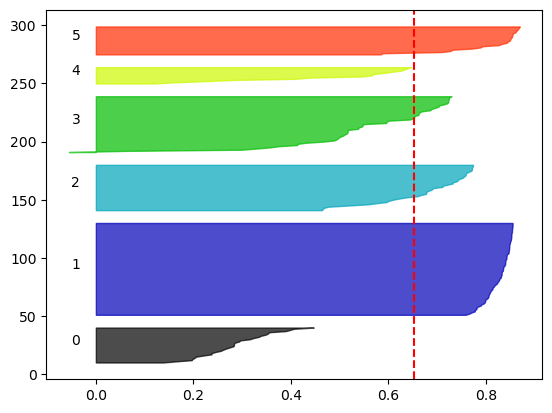

In [44]:
N = 6
categ = kmean(N, datapst)
silueta(datapst, categ, N)
plt.savefig('6-sil', dpi=300)
plt.show()

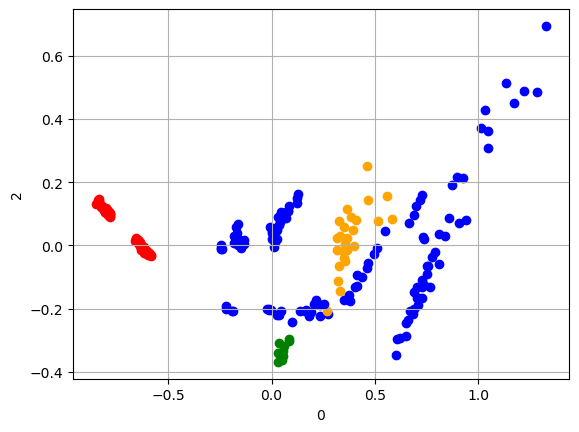

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 3 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
clusters: 4


In [54]:
from sklearn.cluster import DBSCAN 

def dbscan(epsilon =0.15, minN = 5, plot='n'):

    color = ['red', 'blue', 'green', 'orange', 'black', 'purple', 'pink', 'cyan', 'magenta', 'brown']

    dbscan = DBSCAN(eps=epsilon, min_samples=minN).fit(datapst)
    categorias = dbscan.labels_
    #print(str((categorias == -1).sum())+' Outliers')
    #print(str(categorias.max()+1)+' Agrupamentos')

    if plot == 'n': return categorias

    feat1 = 0
    feat2 = 2

    for i in range(len(clusters)):
        plt.scatter([datapst[feat1][i]], [datapst[feat2][i]], color = color[categorias[i]])

    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.grid()
    plt.savefig('7-%sx%s' %(feat1, feat2))
    plt.show()

    return categorias

categ = dbscan(epsilon =0.32, minN = 5, plot='y')
print('clusters:', max(categ)+1)

/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.32
minN 6


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


/tmp/ipykernel_3456/829351528.py:23: RuntimeWarning: invalid value encountered in divide
  MP = np.array(Yscore)/np.array(pontos_bad)


epsilon 0.28
minN 5


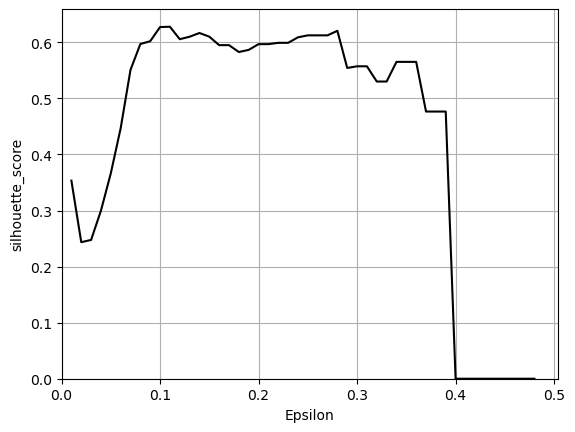

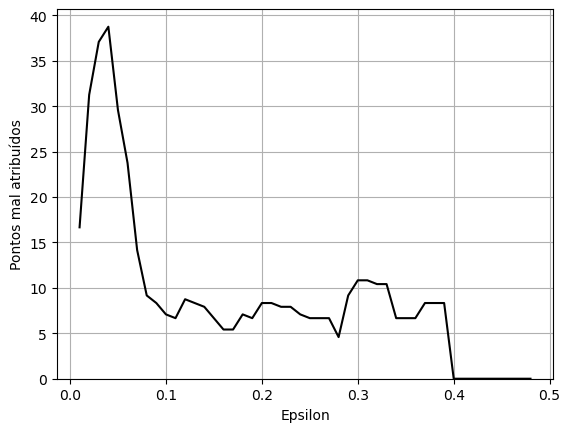

/tmp/ipykernel_3456/829351528.py:76: RuntimeWarning: invalid value encountered in divide
  plt.plot(Xcat, np.array(Yscore)/np.array(pontos_bad), color = 'black')


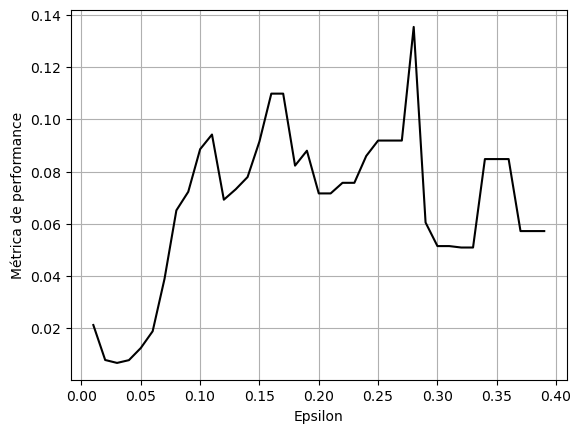

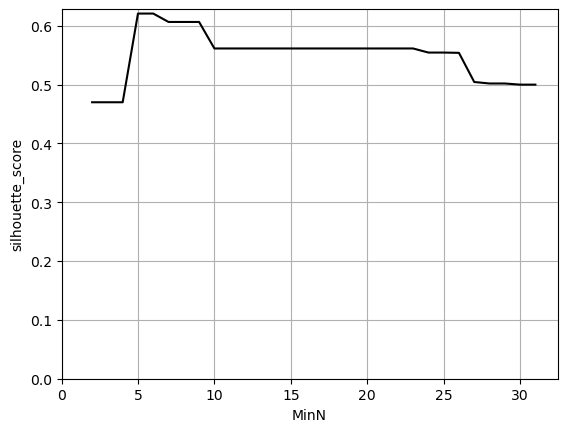

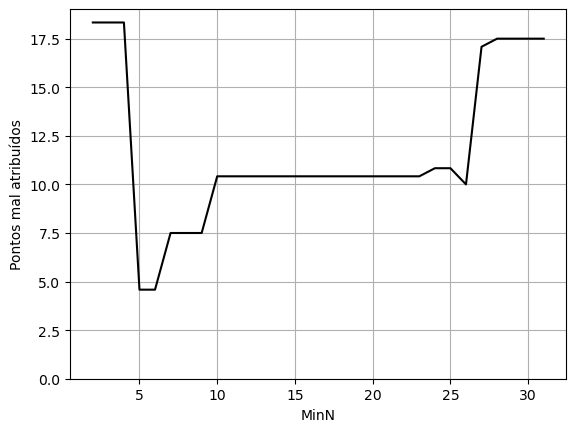

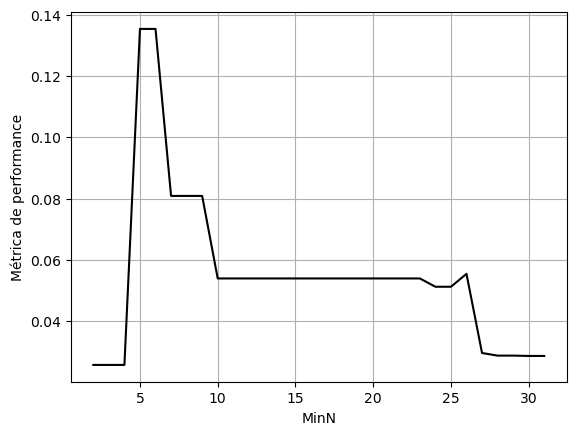

In [33]:
def epsdb(epsilon =0.01, minN = 7, maxe = 0.5, de = 0.01):

    N = int((maxe-epsilon)//de)

    Xcat = [epsilon+ de*i for i in range(N)]
    Yscore = [0 for i in range(N)]
    Ysamp = [0 for i in range(N)]
    pontos_bad = [0 for i in range(N)]

    for i in range(N):

        categ = dbscan(epsilon = epsilon, minN=minN)
        if max(categ) == 0: continue

        Yscore[i] = silhouette_score(datapst, categ)
        Ysamp[i] = silhouette_samples(datapst, categ)

        mask = ( np.array(Ysamp[i]) < 0 )
        pontos_bad[i] = (100 * mask.sum() / mask.size)

        epsilon += de

    MP = np.array(Yscore)/np.array(pontos_bad)
    MP = np.nan_to_num(MP, nan=0)

    xmax = Xcat[np.argmax(MP)]
    print('epsilon', xmax)

    return Xcat, Yscore, pontos_bad, xmax

def mindb(maxe = 0.3, N = 30):

    Xcat = [2 + i for i in range(N)]
    Yscore = [0 for i in range(N)]
    Ysamp = [0 for i in range(N)]
    pontos_bad = [0 for i in range(N)]

    for i in range(N):

        categ = dbscan(epsilon = maxe, minN=Xcat[i])
        if max(categ) == 0: continue

        Yscore[i] = silhouette_score(datapst, categ)
        Ysamp[i] = silhouette_samples(datapst, categ)

        mask = ( np.array(Ysamp[i]) < 0 )
        pontos_bad[i] = (100 * mask.sum() / mask.size)

    MP = np.array(Yscore)/np.array(pontos_bad)
    MP = np.nan_to_num(MP, nan=0)

    xmax = Xcat[np.argmax(MP)]
    print('minN', xmax)

    return Xcat, Yscore, pontos_bad, xmax

def plotdb(Xcat, Yscore, pontos_bad):
    plt.plot(Xcat, Yscore, color = 'black')
    plt.grid()
    plt.xlabel('Epsilon')
    plt.ylabel('silhouette_score')
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

    plt.figure()
    plt.grid()
    plt.plot(Xcat, pontos_bad, color = 'black')
    plt.xlabel('Epsilon')
    plt.ylabel('Pontos mal atribuídos')
    plt.ylim(0)
    plt.show()

    plt.figure()
    plt.grid()
    plt.plot(Xcat, np.array(Yscore)/np.array(pontos_bad), color = 'black')
    plt.xlabel('Epsilon')
    plt.ylabel('Métrica de performance')
    plt.savefig('7-perf', dpi=300)
    plt.show()

def plotdb1(Xcat, Yscore, pontos_bad):
    plt.plot(Xcat, Yscore, color = 'black')
    plt.grid()
    plt.xlabel('MinN')
    plt.ylabel('silhouette_score')
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

    plt.figure()
    plt.grid()
    plt.plot(Xcat, pontos_bad, color = 'black')
    plt.xlabel('MinN')
    plt.ylabel('Pontos mal atribuídos')
    plt.ylim(0)
    plt.show()

    plt.figure()
    plt.grid()
    plt.plot(Xcat, np.array(Yscore)/np.array(pontos_bad), color = 'black')
    plt.xlabel('MinN')
    plt.ylabel('Métrica de performance')
    plt.savefig('7-perf1', dpi=300)
    plt.show()

minN = 7
for i in range(10):
    X, Ys, p_b, xmax = epsdb(minN = minN)
    X1, Ys1, p_b1, minN = mindb(maxe = xmax)


plotdb(X, Ys, p_b)
plotdb1(X1, Ys1, p_b1)

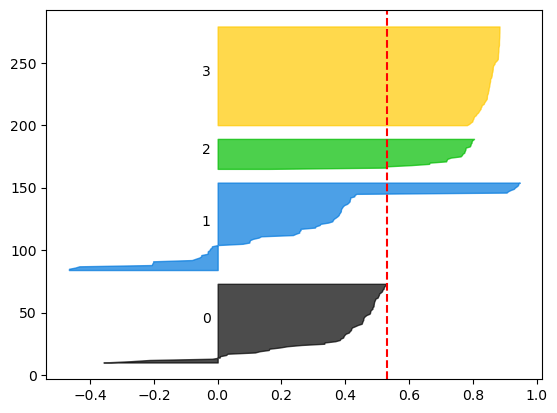

In [50]:
categ = dbscan(epsilon =0.32, minN = 5)

N = max(categ) + 1
silueta(datapst, categ, N)
plt.savefig('7-sil', dpi=300)
plt.show()